In [2]:
import sys
sys.path.append('../src/')

import numpy as np
import matplotlib.pyplot as plt

from lorenz import Model

# lorenz

The lorenz system is described by the evolution in time of three coordinates x,y,z. This evolution is described by the following equations.
$$\frac{\partial x}{\partial t} = \sigma(x-y)$$
$$\frac{\partial y}{\partial t} = x(\rho - z) - y$$
$$\frac{\partial z}{\partial t} = xy - \beta z$$
With $\sigma$, $\rho$ and $\beta$, 3 parameters (reals). Depending on the set of parameters, the trajectory of the lorenz system can results in different patterns.

propagation stopped, end time reached at iteration 1000
propagation stopped, end time reached at iteration 1000
propagation stopped, end time reached at iteration 1000


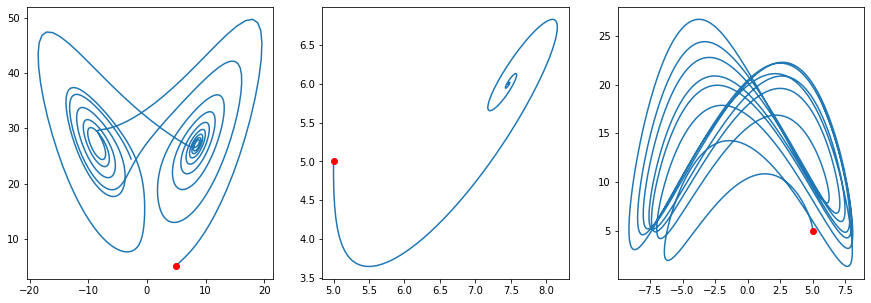

In [19]:
# time parameters
T_lorenz = 10. # time in seconds of simulation
dt_lorenz = 0.01 # time step of model in second

# parameters sigma, rho and beta for three lorenz model
params = [[10.,28.,8/3],[10.,7.,9.3],[-2,21.,2.]]

# initial coordinate, same for all three models
X_initial = np.array([5.,5.,5.])

models = [Model(dt_lorenz,T_lorenz,params[i],X_initial) for i in range(3)]

for i in range(len(models)) :
    models[i].forward(1000)

##### plot lorenz trajectories #####

fig, axs = plt.subplots(1,3,figsize=(15,5))
for ax,i in zip(axs,range(len(models))) :
    ax.plot(models[i].xvar_series[:,0],models[i].xvar_series[:,2])
    ax.plot(X_initial[0],X_initial[2],marker='o',color='r')

## chaotic behavior of the lorenz system

The most known characteristic of the lorenz system of equations is its chaotic behavior. Meaning that even a small variation in the initial conditions will results in a totally different trajectory after a certain time. Not only the initial conditions, a small change in parameters values ($\sigma$, $\rho$, $\beta$) or a different numerical scheme will also lead to substantial differences.

propagation stopped, end time reached at iteration 2000
propagation stopped, end time reached at iteration 2000


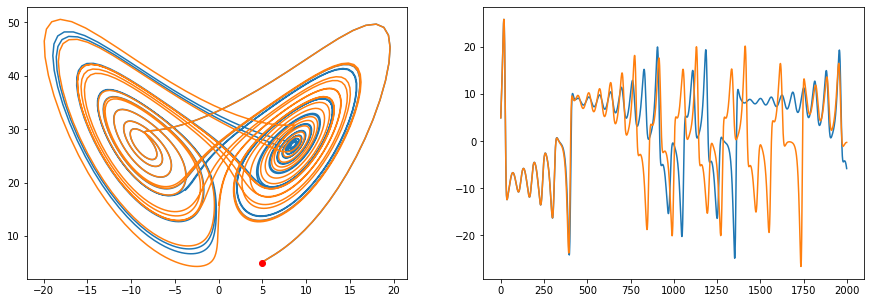

In [33]:
T_lorenz = 20. # time in seconds of simulation
dt = 0.01 # time step of model in second

param = [10.,28.,8/3] # parameters

X_initial = np.array([5.,5.,5.]) # initial coordinates
dX = np.array([0.,0.,0.01]) # difference in initial coordinates

model_ref = Model(dt,T_lorenz,param,X_initial)
model_bis = Model(dt,T_lorenz,param,X_initial+dX)

model_ref.forward(2000)
model_bis.forward(2000)

##### plot lorenz trajectories #####

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(model_ref.xvar_series[:,0],model_ref.xvar_series[:,2])
ax1.plot(model_bis.xvar_series[:,0],model_bis.xvar_series[:,2])
ax1.plot(X_initial[0],X_initial[2],marker='o',color='r')

ax2.plot(model_ref.xvar_series[:,1])
ax2.plot(model_bis.xvar_series[:,1])